# Dashboards in Python

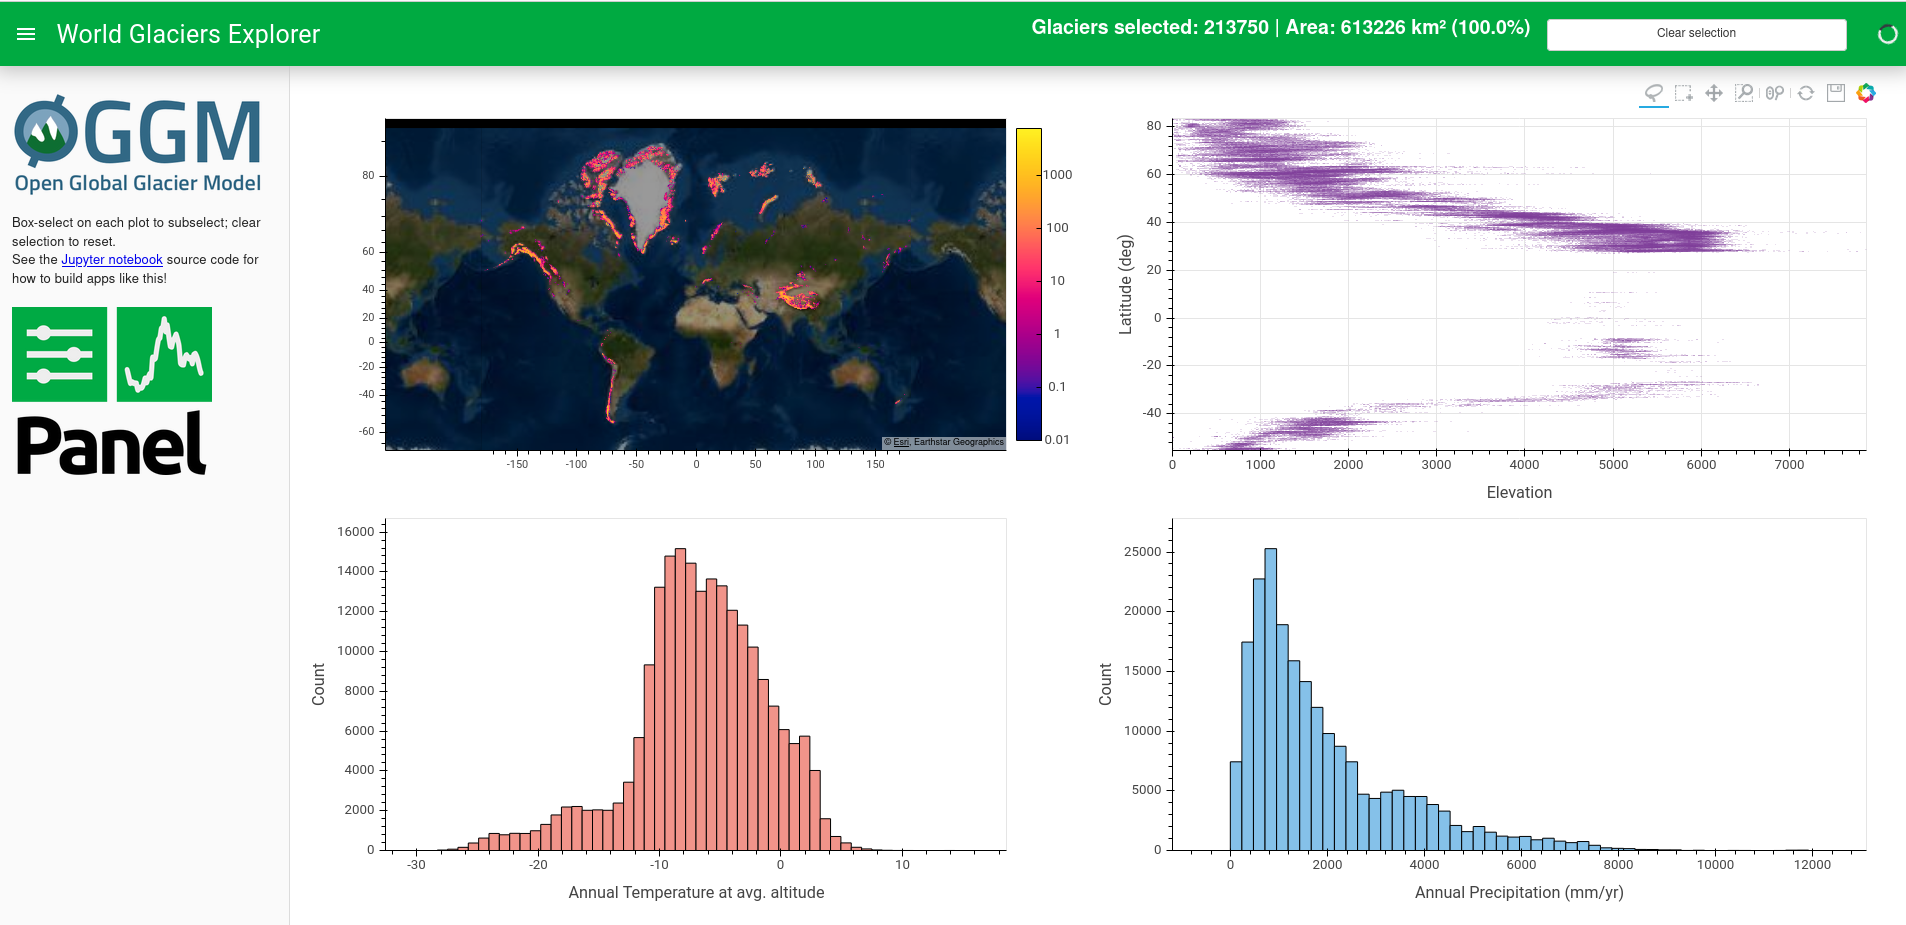
*screenshot from https://glaciers.pyviz.demo.anaconda.com/glaciers*

## Introduction

What is a dashboard?

- a set of interactive plots to visualize data, in one page / interface
- we will assume webapps here :-)
- deployed once and accessible by multiple users

Some use cases

- share visualization with colleagues
- share visualization with wider audience (on the web)
- monitor systems
- explore data located on a distant server (e.g. results of simulations)

## Some considerations

Do you need a dashboard?

- we can use a GUI on a local machine (or exported X display)
- don't forget matplotlib is interactive
- consider high performance libraries or tools (e.g. napari, paraview)
- we can use html + js plots and just serve pages

How will you deploy your dashboard?

- who pays for the server? how do you scale with number of users?
- how to deal with authentication?
- is the data accessible from the server?

## Dashboard components

plotting libraries (create image or js code)

- matplotlib / seaborn / pandas .plot / xarray .plot
- [plotly](https://plotly.com/python/) / [plotly express](https://plotly.com/python/plotly-express) (+ datashader)
- bokeh / holoviews / hvplot (+ datashader)
- vega, vega-lite / altair (+ vegafusion)

dashboard library (run server, callbacks, widgets)

- ipywdgets
- streamlit (matplotlib, plotly, holoviews, altair)
- dash (plotly)
- panel (matplotlib, plotly, **holoviews**, altair)

## Palmer penguins dataset

<img alt="penguins" src="https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/man/figures/lter_penguins.png" width=500 />

*Artwork by @allison_horst*

Data were collected and made available by [Dr. Kristen Gorman](https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php) and the [Palmer Station, Antarctica LTER](https://pal.lternet.edu/), a member of the [Long Term Ecological Research Network](https://lternet.edu/).

Data are available by  [CC-0](https://creativecommons.org/share-your-work/public-domain/cc0/) license in accordance with the [Palmer Station LTER Data Policy](http://pal.lternet.edu/data/policies) and the [LTER Data Access Policy for Type I data](https://lternet.edu/data-access-policy/).

In [ ]:
import pandas as pd

dset = pd.read_csv("dataset.csv")
dset["Species"] = dset.Species.str.split(" \(").str[0]
dset.head()

## Seaborn example

In [ ]:
import seaborn as sb

sb.set()

In [ ]:
sb.relplot(
    data=dset,
    x="Culmen Length (mm)",
    y="Body Mass (g)",
    hue="Species",
    col="Sex FEMALE",
)

## Plotly Express example

In [ ]:
import plotly.express as px

In [ ]:
px.scatter(
    dset,
    x="Culmen Length (mm)",
    y="Body Mass (g)",
    color="Species",
    facet_col="Sex FEMALE",
)

## HvPlot example

In [ ]:
import hvplot.pandas  # noqa
import holoviews as hv

In [ ]:
dset.hvplot.scatter(
    x="Culmen Length (mm)",
    y="Body Mass (g)",
    color="Species",
    by="Sex FEMALE",
    subplots=True,
    grid=True,
    legend="bottom",
)

In [ ]:
dset_male = dset[dset["Sex FEMALE"] == False]
hv_male = dset_male.hvplot.scatter(
    x="Culmen Length (mm)", y="Body Mass (g)", color="Species", label="Male"
)

dset_female = dset[dset["Sex FEMALE"] == False]
hv_female = dset_female.hvplot.scatter(
    x="Culmen Length (mm)", y="Culmen Depth (mm)", color="Species", label="Female"
)

(hv_male + hv_female).opts(hv.opts.Scatter(legend_position="bottom", show_grid=True))

## Altair example

In [ ]:
import altair as alt

In [ ]:
alt.Chart(dset).mark_circle().encode(
    alt.X("Culmen Length (mm)", scale=alt.Scale(zero=False)),
    alt.Y("Culmen Depth (mm)", scale=alt.Scale(zero=False)),
    color="Species",
    column="Sex FEMALE",
).interactive()

In [ ]:
brush = alt.selection_interval()

chart_points = (
    alt.Chart(dset)
    .mark_circle()
    .encode(
        alt.X("Culmen Length (mm)", scale=alt.Scale(zero=False)),
        alt.Y("Culmen Depth (mm)", scale=alt.Scale(zero=False)),
        color=alt.condition(brush, "Species", alt.value("lightgray")),
        size=alt.condition(brush, alt.value(50), alt.value(10)),
    )
    .add_selection(brush)
)

depth_min, depth_max = dset["Culmen Depth (mm)"].quantile([0, 1])

hist_depth = (
    alt.Chart(dset)
    .mark_bar()
    .encode(
        alt.X(
            "Culmen Depth (mm)",
            scale=alt.Scale(zero=False, domain=(depth_min, depth_max)),
            bin=alt.Bin(step=0.3),
        ),
        y="count():Q",
    )
    .properties(height=100)
    .transform_filter(brush)
)

length_min, length_max = dset["Culmen Length (mm)"].quantile([0, 1])

hist_length = (
    alt.Chart(dset)
    .mark_bar()
    .encode(
        alt.Y(
            "Culmen Length (mm)",
            scale=alt.Scale(zero=False, domain=(length_min, length_max)),
            bin=alt.Bin(step=1),
        ),
        x="count():Q",
    )
    .properties(width=100)
    .transform_filter(brush)
)

hist_depth & (chart_points | hist_length)

More advance example: [Exploring Seattle Weather](https://altair-viz.github.io/case_studies/exploring-weather.html).

## Streamlit

TODO present

mention (demonstrate?) live reloading, caching, etc.

In [ ]:
%%writefile dashboard_test.py

import pandas as pd
import seaborn as sb
import streamlit as st

sb.set()

dset = pd.read_csv("dataset.csv")
dset["Species"] = dset.Species.str.split(" \(").str[0]

st.write("Some elements of the Palmer dataset dataset :penguin:")
st.write(dset.head())

x = st.sidebar.selectbox("x", dset.columns[1:-1], index=0)
y = st.sidebar.selectbox("y", dset.columns[1:-1], index=1)
female = st.checkbox("Female")

dset_select = dset[dset["Sex FEMALE"] == female]

if x == y:
    fig = sb.displot(data=dset_select, x=x, kind="kde", hue="Species", rug=True)
else:
    fig = sb.relplot(data=dset_select, x=x, y=y, hue="Species")

st.pyplot(fig)

In [ ]:
!streamlit run dashboard_test.py

On Jupyter-on-NeSI, check the proxied app at https://jupyter.nesi.org.nz/user-redirect/proxy/8501/.

## Panel

TODO present

mention servable, other panels (link to doc), multiple APIs

`jupyter labextension install @pyviz/jupyterlab_pyviz` or `pip install pyviz_comms` to get .app working?

In [ ]:
import panel as pn

pn.extension(sizing_mode="stretch_width")

In [ ]:
x = pn.widgets.Select(name="x", options=dset.columns[1:-1].to_list())
x.value = dset.columns[1]
x

In [ ]:
y = pn.widgets.Select(name="x", options=dset.columns[1:-1].to_list())
y.value = dset.columns[2]
y

In [ ]:
female = pn.widgets.Checkbox(name="female")
female

In [ ]:
def plot(x, y, female):
    dset_select = dset[dset["Sex FEMALE"] == female]
    return dset_select.hvplot.scatter(x=x, y=y, color="Species", grid=True, height=500)

In [ ]:
panel = pn.Row(
    pn.Column(x, y, female, sizing_mode="stretch_height", width=300),
    pn.bind(plot, x, y, female),
)
panel

In [ ]:
server = pn.serve(
    panel, show=False, port=9003, websocket_origin="jupyter.nesi.org.nz", verbose=False
)

On Jupyter-on-NeSI, check the proxied app at https://jupyter.nesi.org.nz/user-redirect/proxy/9003/.

In [ ]:
server.stop()

In [ ]:
panel = pn.template.FastListTemplate(
    title="My example dashboard",
    main=pn.bind(plot, x, y, female),
    sidebar=[x, y, female],
)
server = pn.serve(
    panel, show=False, port=9003, websocket_origin="jupyter.nesi.org.nz", verbose=False
)

In [ ]:
server.stop()

TODO advance example (xarray + datashader) in separate notebook